<a href="https://colab.research.google.com/github/Nofryntii/DATAMINING/blob/main/predikasikursaud_linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
# Membaca data dari file Excel
df = pd.read_excel('new.xlsx')
df

,Tanggal,KursJual,KursBeli
0,2023-01-02,10625.80,10516.97
1,2023-01-03,10651.29,10542.21
2,2023-01-04,10632.27,10520.27
3,2023-01-05,10735.64,10625.70
4,2023-01-06,10689.84,10577.26
...,...,...,...
109,2023-06-21,10291.94,10182.05
110,2023-06-22,10190.52,10081.66
111,2023-06-23,10185.97,10077.19
112,2023-06-26,10094.38,9992.45


In [31]:
# Mengonversi kolom tanggal ke format yang sesuai (opsional)
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%Y-%m-%d')

In [32]:
# Mengubah kolom tanggal menjadi variabel numerik (jumlah hari sejak tanggal awal)
df['Hari'] = (df['Tanggal'] - df['Tanggal'].min()).dt.days
df

,Tanggal,KursJual,KursBeli,Hari
0,2023-01-02,10625.80,10516.97,0
1,2023-01-03,10651.29,10542.21,1
2,2023-01-04,10632.27,10520.27,2
3,2023-01-05,10735.64,10625.70,3
4,2023-01-06,10689.84,10577.26,4
...,...,...,...,...
109,2023-06-21,10291.94,10182.05,170
110,2023-06-22,10190.52,10081.66,171
111,2023-06-23,10185.97,10077.19,172
112,2023-06-26,10094.38,9992.45,175


In [35]:
# Memisahkan variabel independen (Hari) dan dependen (Nilai)
X = df[['Hari']].values
y = df['KursJual'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('R^2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('MAPE: {:.2f}%'.format(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100))

MSE: 50392.397
MAE: 172.725
R^2: 0.429
MAPE: 1.69%


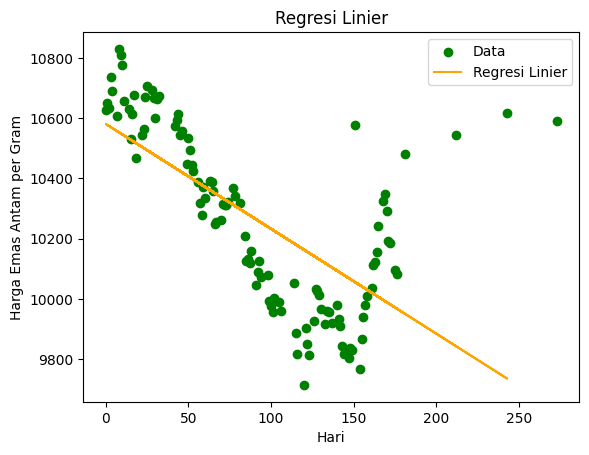

In [40]:
# Menampilkan grafik regresi linier
plt.scatter(X, y, color='green', label='Data')
plt.plot(X_train, y_train_pred, color='orange', label='Regresi Linier')
plt.xlabel('Hari')
plt.ylabel('Harga Emas Antam per Gram')
plt.legend()
plt.title('Regresi Linier')
plt.show()